# Qiskit Test for FYP

In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

In [2]:
circuit = QuantumCircuit(2)

In [3]:
# MAX-CUT circuit for 2-vertices problem
theta = np.pi
circuit.h(0)
circuit.h(1)
circuit.cx(1,0)
circuit.rz(3/2*theta,0)
circuit.cx(1,0)
circuit.rx(theta/4,0)
circuit.rx(theta/4,1)

In [4]:
circuit.draw()

In [5]:
#Aer
backend = qiskit.Aer.get_backend('statevector_simulator')

In [6]:
job = execute(circuit, backend)
result = job.result()

In [7]:
outputstates = result.get_statevector(circuit, decimals=10)
print(outputstates)

[0.+0.j         0.-0.70710678j 0.-0.70710678j 0.+0.j        ]


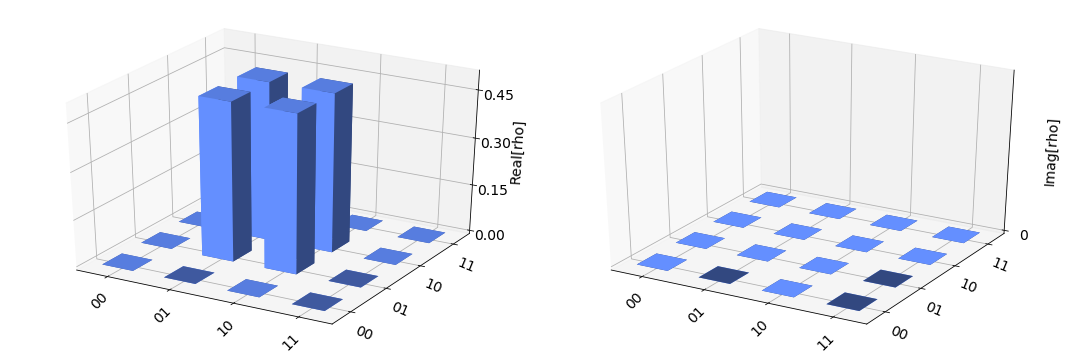

In [8]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstates)

In [9]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(circuit, backend)
result = job.result()

# Show the results
print(result.get_unitary(circuit, decimals=5))

[[ 0.     +0.j       0.5    +0.j       0.5    +0.j       0.70711+0.j     ]
 [ 0.     -0.70711j  0.     +0.5j      0.     -0.5j      0.     +0.j     ]
 [ 0.     -0.70711j  0.     -0.5j      0.     +0.5j      0.     +0.j     ]
 [ 0.     +0.j      -0.5    +0.j      -0.5    +0.j       0.70711+0.j     ]]


In [10]:
# Create a Quantum Circuit
meas = QuantumCircuit(2, 2)
meas.barrier(range(2))
# map the quantum measurement to the classical bits
meas.measure(range(2),range(2))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circuit+meas

#drawing the circuit
qc.draw()

In [11]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()


In [12]:
counts = result_sim.get_counts(qc)
print(counts)

{'10': 527, '01': 497}


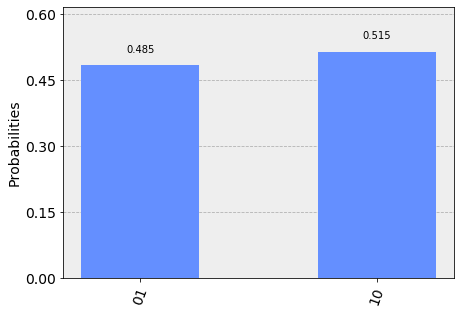

In [13]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)